Customer churn prediction is to measure why customers are leaving a business

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3220,8205-VSLRB,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),77.30,5498.2,No
1670,5047-LHVLY,Male,1,No,Yes,1,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,50.15,50.15,Yes


In [4]:
df.drop(columns=['customerID'],inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [7]:
df.TotalCharges.isnull().sum()

np.int64(0)

In [8]:
df.shape

(7043, 20)

In [9]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [10]:
df1 = df[df.TotalCharges!=' '].copy()
df1.shape

(7032, 20)

In [11]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df1[df1.Churn=='No'].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


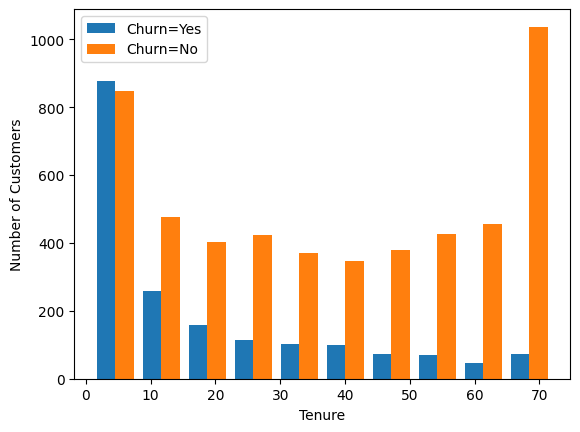

In [14]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

plt.hist([tenure_churn_yes, tenure_churn_no],label=['Churn=Yes', 'Churn=No'])
plt.legend()

1. High churn among very new customers
2. Churn rate drops as tenure increases
3. Long-term customers almost never churn
4. Loyalty spikes at 70 months

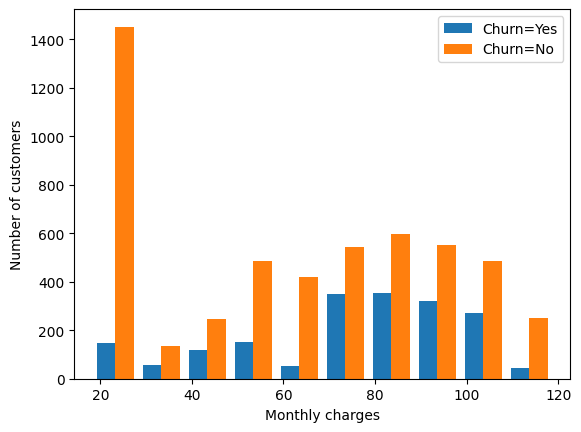

In [15]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly charges')
plt.ylabel('Number of customers')

plt.hist([mc_churn_yes, mc_churn_no], label=['Churn=Yes', 'Churn=No'])
plt.legend()

1. Very low churn at the cheapest plans (~20–30)
2. Higher churn in mid-to-high monthly charges (~70–110)
3. Moderate churn in mid-range plans ($40–60)
4. Business implications
- Retention strategies should focus on mid- to high-paying customers, as they represent a significant churn risk.
- For the low-paying customers, the company might upsell without risking much churn.
- Pricing optimization and bundling might help reduce high churn in expensive plans.

In [16]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [17]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
df1 = df1.copy()
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [19]:
df1 = df1.copy()
df1.replace({'Yes':1,'No':0}, inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_12892\1943907996.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Yes':1,'No':0}, inplace=True)


In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
df1['gender'] = df1['gender'].replace({'Female':1, 'Male':0}).astype(int)
df1.gender.unique()

C:\Users\aksha\AppData\Local\Temp\ipykernel_12892\3988474779.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'] = df1['gender'].replace({'Female':1, 'Male':0}).astype(int)


array([1, 0])

In [23]:
df2 = pd.get_dummies(data=df1, columns = ['InternetService', 'Contract', 'PaymentMethod']).astype(int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4991,1,0,0,0,58,1,0,1,1,1,...,0,0,1,0,1,0,0,0,1,0
4168,0,0,1,0,61,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3477,1,0,0,0,18,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3008,1,0,0,0,11,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
6505,0,0,1,1,56,1,0,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [25]:
df2.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                             int64
TotalCharges                               int64
Churn                                      int64
InternetService_0                          int64
InternetService_DSL                        int64
InternetService_Fiber optic                int64
Contract_Month-to-mo

In [26]:
cols_to_scale = ['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

### Train Test Split

In [27]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5625, 26) (1407, 26) (5625,) (1407,)


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407

[[890 109]
 [182 226]]


Text(50.722222222222214, 0.5, 'Truth')

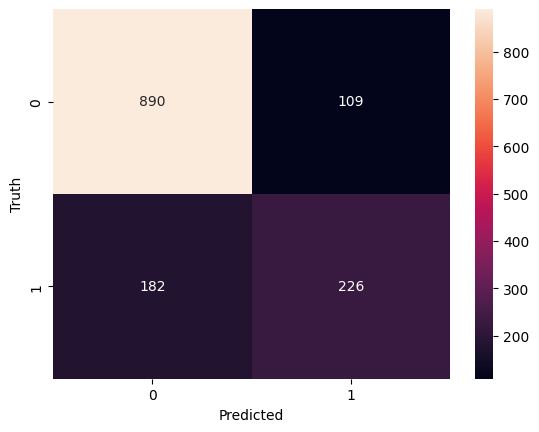

In [32]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Handling imbalanced data in customer churn prediction

In [33]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [34]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

In [35]:
y_train.value_counts()

Churn
0    4164
1    1461
Name: count, dtype: int64

In [36]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [37]:
def LR(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    acc = accuracy_score(y_test, y_preds)
    print(f'Accuracy: {acc:.4f}')
    print(f'Classification Report: \n', classification_report(y_test, y_preds))
    return y_preds

In [38]:
LR(X_train, y_train, X_test, y_test)

Accuracy: 0.7932
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



array([0, 0, 0, ..., 1, 1, 0], shape=(1407,))

## Method 1: Undersampling

In [39]:
count_class_0, count_class_1 = df2.Churn.value_counts()

df_class_0 = df2[df2.Churn==0]
df_class_1 = df2[df2.Churn==1]

In [40]:
print(count_class_0, count_class_1)

5163 1869


#### Random under-sampling

Churn
0    1869
1    1869
Name: count, dtype: int64


<Axes: xlabel='Churn'>

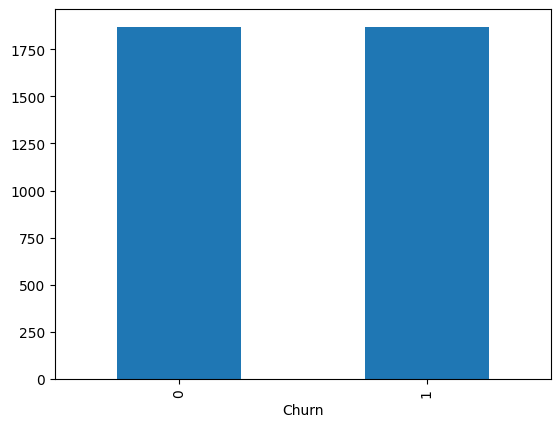

In [41]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print(df_test_under.Churn.value_counts())
df_test_under.Churn.value_counts().plot(kind='bar')

In [50]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2990, 26) (748, 26) (2990,) (748,)


In [52]:
under_pred = LR(X_train, y_train, X_test, y_test)

Accuracy: 0.7701
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       377
           1       0.75      0.80      0.77       371

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

### Random over-sampling

Churn
0    5163
1    5163
Name: count, dtype: int64


<Axes: xlabel='Churn'>

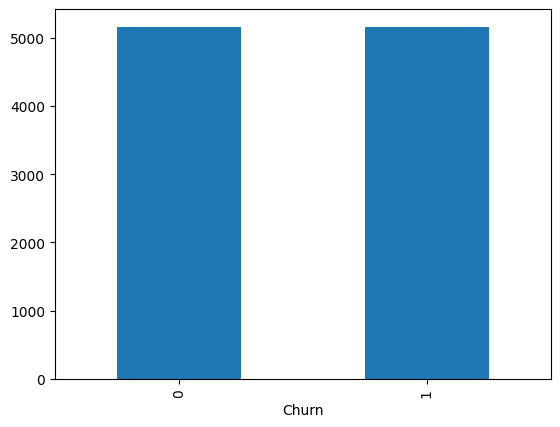

In [53]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print(df_test_over.Churn.value_counts())
df_test_over.Churn.value_counts().plot(kind='bar')

In [54]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8260, 26) (2066, 26) (8260,) (2066,)


In [55]:
over_pred = LR(X_train, y_train, X_test, y_test)

Accuracy: 0.7599
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      1037
           1       0.74      0.81      0.77      1029

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

### Python imbalanced-learn module

### Method -3 SMOTE

In [56]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [60]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [59]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [63]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [64]:
smote_preds = LR(X_train, y_train, X_test, y_test)

Accuracy: 0.8020
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      1033
           1       0.78      0.83      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

